# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load Prices

- loads all 3 dataframes and merges into one

In [4]:
def get_prices(round: int, day: int):

    path = f"../../data/round{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")


def get_trades(round: int, day: int):

    path = f"../../data/round{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

price_frames = []
trade_frames = []

for day in range(-2, 1):  

    prices = get_prices(1, day)
    trades = get_trades(1, day)
    price_frames.append(prices)
    trade_frames.append(trades)

all_prices = pd.concat(price_frames, ignore_index=True)
all_trades = pd.concat(trade_frames, ignore_index=True)
all_prices.head(5)



,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0


In [5]:
all_prices_squid_ink = all_prices[all_prices["product"] == "SQUID_INK"]
all_prices_kelp = all_prices[all_prices["product"] == "KELP"]
all_prices_resin = all_prices[all_prices["product"] == "RAINFOREST_RESIN"]



# Price paths on 3 different days

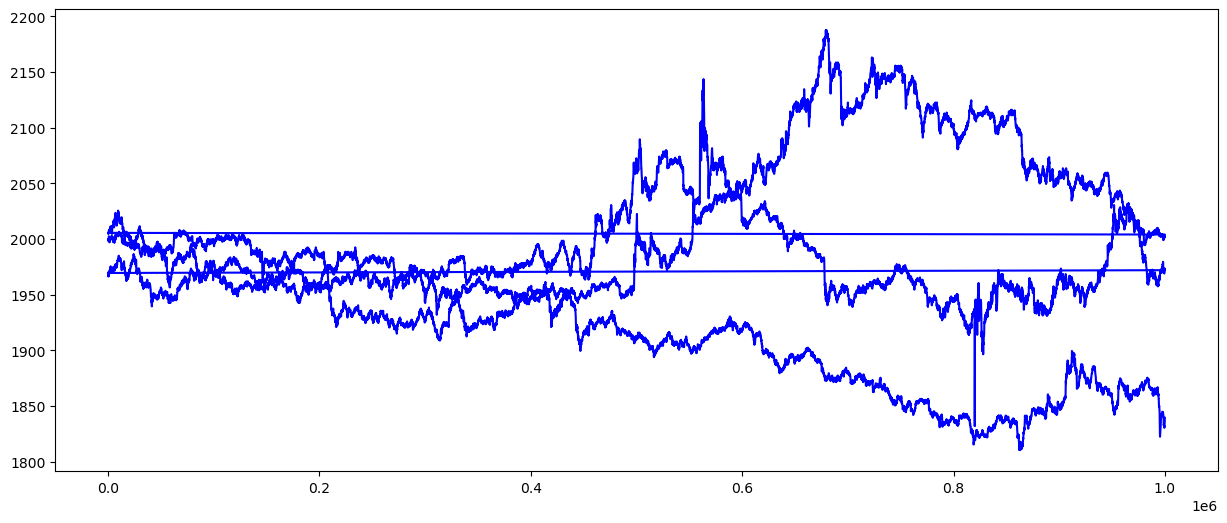

In [6]:
#Squid Ink
plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink['timestamp'], all_prices_squid_ink['mid_price'], label='Mid Price', color='blue')


In [7]:
#For first hald it remains around 2000
#For the second half then it trends 

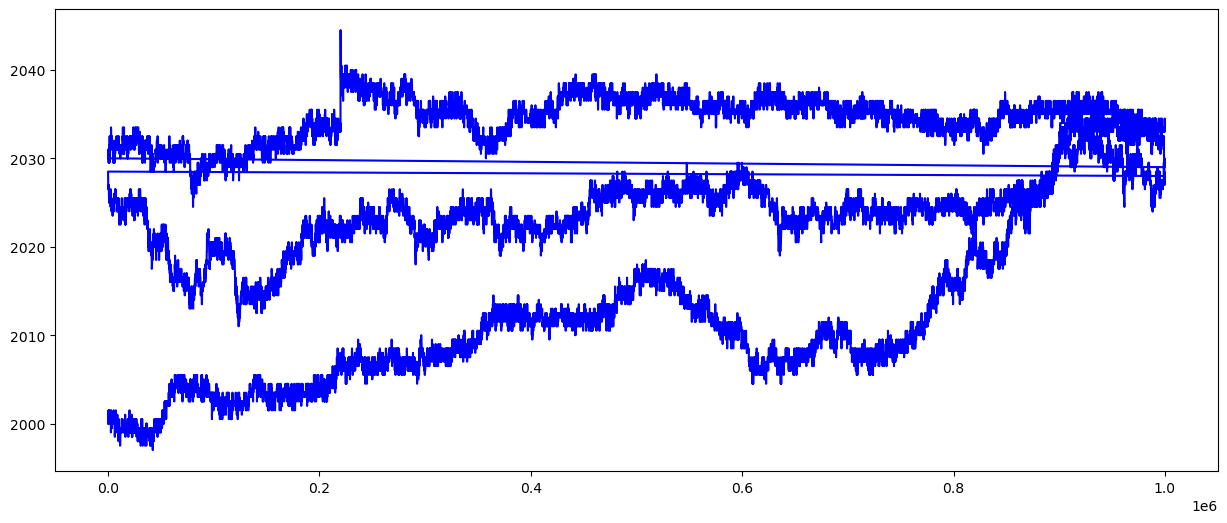

In [8]:
#Kelp
plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_kelp['timestamp'], all_prices_kelp['mid_price'], label='Mid Price', color='blue')

# Autocorrelation

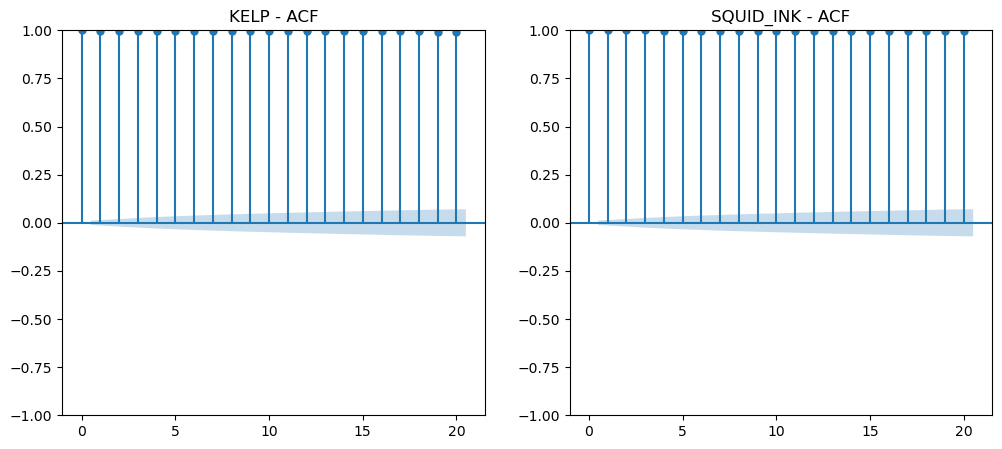

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(all_prices_kelp['mid_price'], lags=20, ax=axes[0])
axes[0].set_title('KELP - ACF')

plot_acf(all_prices_squid_ink['mid_price'], lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - ACF')

plt.show()


In [10]:
all_prices_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
5,-2,100,KELP,2000,5,1999.0,6.0,1998.0,20.0,2002,20,NaN,NaN,NaN,NaN,2001.0,0.0
6,-2,200,KELP,1999,1,1998.0,30.0,NaN,NaN,2002,31,NaN,NaN,NaN,NaN,2000.5,0.0
10,-2,300,KELP,1999,27,NaN,NaN,NaN,NaN,2002,27,NaN,NaN,NaN,NaN,2000.5,0.0
13,-2,400,KELP,1999,20,NaN,NaN,NaN,NaN,2002,20,NaN,NaN,NaN,NaN,2000.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89987,0,999500,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,0.0
89990,0,999600,KELP,2032,36,NaN,NaN,NaN,NaN,2035,29,NaN,NaN,NaN,NaN,2033.5,0.0
89991,0,999700,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,0.0
89995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0


# Check for stationarity (ADF test)

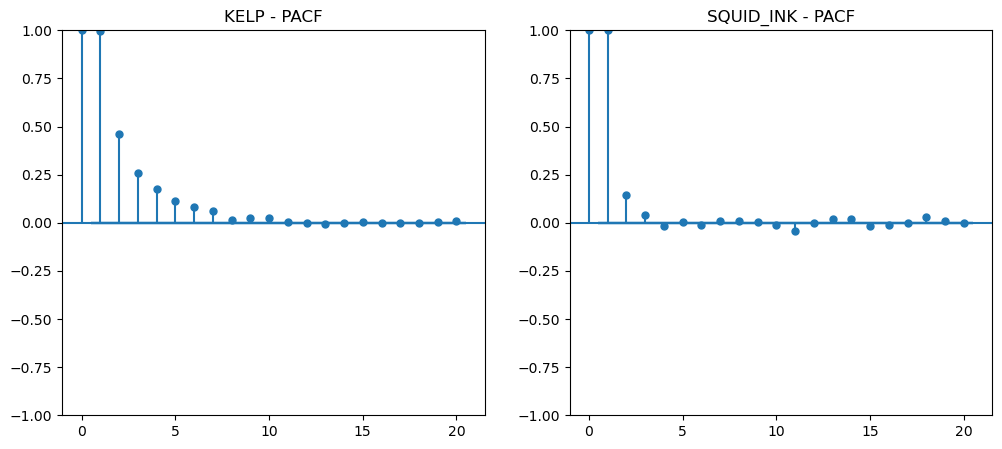

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(all_prices_kelp['mid_price'], lags=20, ax=axes[0])
axes[0].set_title('KELP - PACF')

plot_pacf(all_prices_squid_ink['mid_price'], lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - PACF')

plt.show()

In [12]:
#Kelp
result = adfuller(all_prices_kelp['mid_price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations:", result[3])
print("Critical Values:")

#fail to reject H0
#Series is non-stationary


ADF Statistic: -1.9934524825044906
p-value: 0.2894513162255181
Number of lags used: 37
Number of observations: 29962
Critical Values:


In [13]:
#Squid ink
result = adfuller(all_prices_squid_ink['mid_price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations:", result[3])
print("Critical Values:")


ADF Statistic: -1.383965709726067
p-value: 0.5899385633115669
Number of lags used: 41
Number of observations: 29958
Critical Values:


# Differencing the series and re-analysing

In [14]:
all_prices_kelp['mid_price_first_diff'] = all_prices_kelp['mid_price'].diff()

result = adfuller(all_prices_kelp['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/9v/9q0jfr1s50g3gf5j556kf5ww0000gn/T/ipykernel_9305/4049470531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_kelp['mid_price_first_diff'] = all_prices_kelp['mid_price'].diff()


ADF Statistic: -33.64183723069843
p-value: 0.0


In [15]:
all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()

result = adfuller(all_prices_squid_ink['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/9v/9q0jfr1s50g3gf5j556kf5ww0000gn/T/ipykernel_9305/2520844688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()


ADF Statistic: -27.628007031320802
p-value: 0.0


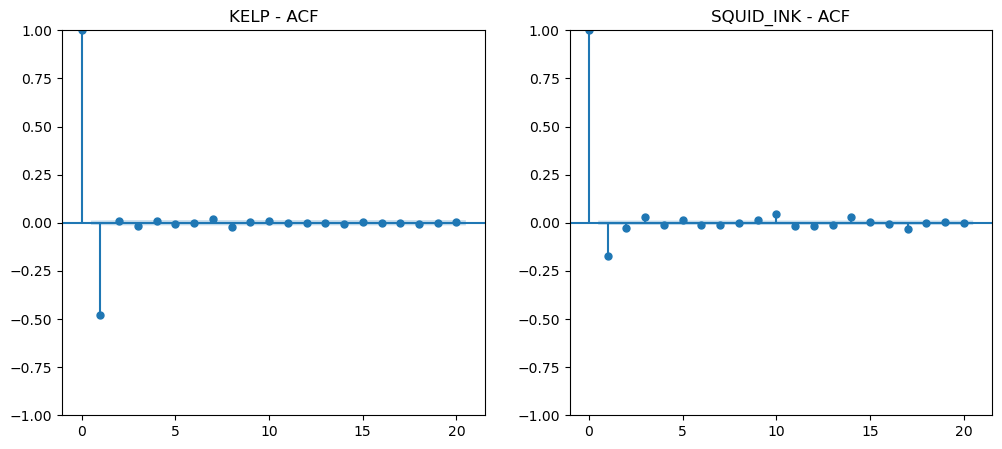

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(all_prices_kelp['mid_price_first_diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('KELP - ACF')

plot_acf(all_prices_squid_ink['mid_price_first_diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - ACF')

plt.show()

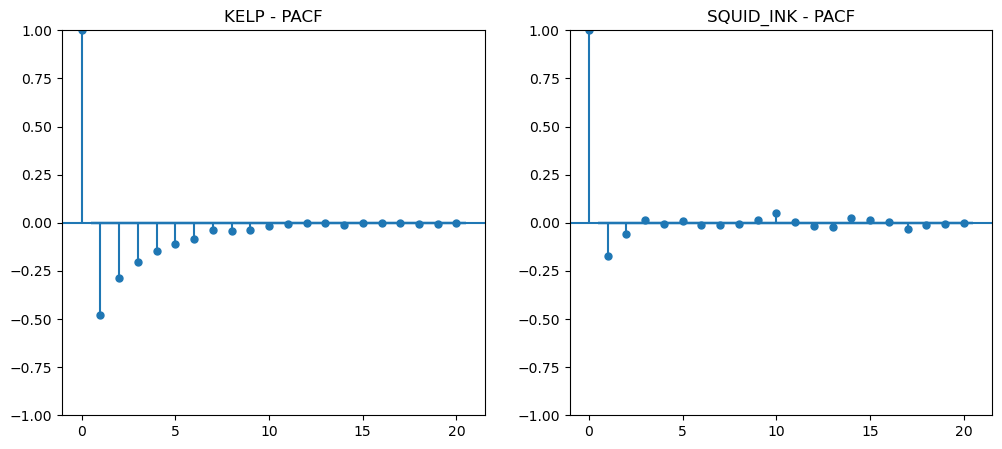

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(all_prices_kelp['mid_price_first_diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('KELP - PACF')

plot_pacf(all_prices_squid_ink['mid_price_first_diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('SQUID_INK - PACF')


plt.show()

# Splitting two regimes

In [46]:
all_prices[(all_prices["product"] == "SQUID_INK")]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
89989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
89993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
89994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


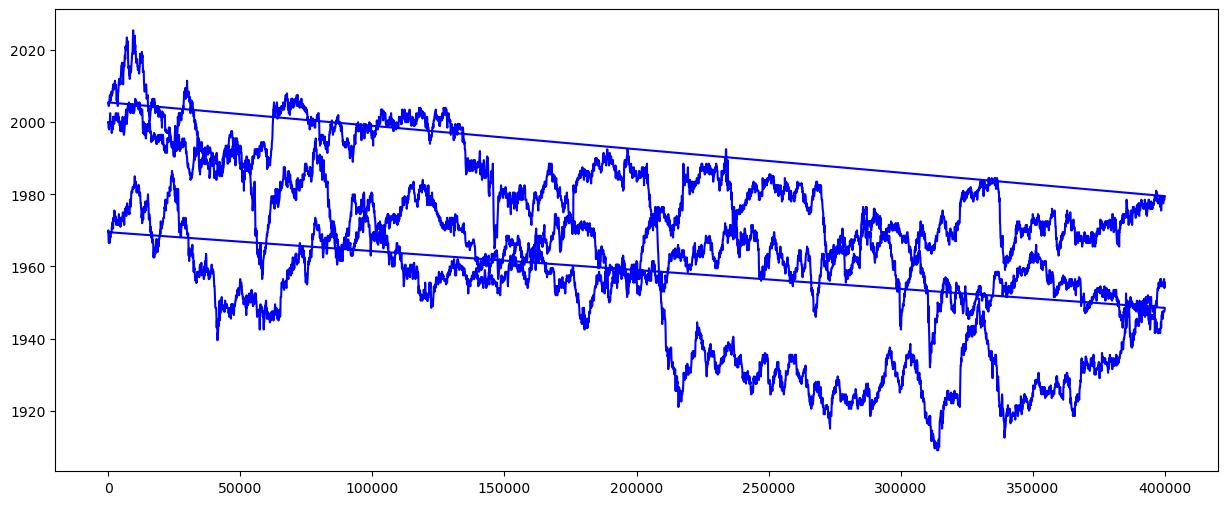

In [19]:
all_prices_squid_ink_one = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] < 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_one['timestamp'], all_prices_squid_ink_one['mid_price'], label='Mid Price', color='blue')


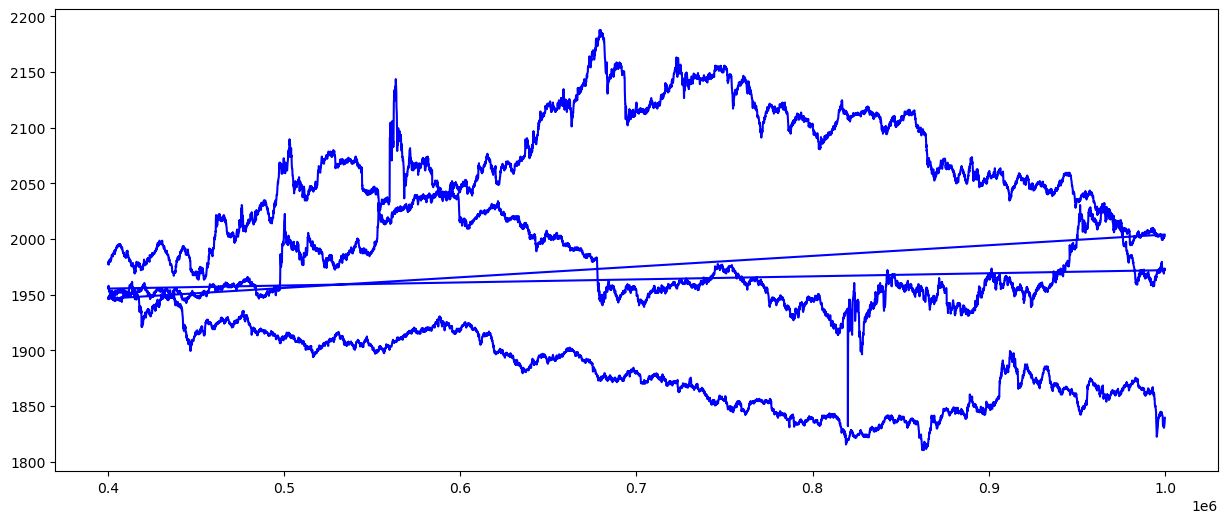

In [20]:
all_prices_squid_ink_two = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] > 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_two['timestamp'], all_prices_squid_ink_two['mid_price'], label='Mid Price', color='blue')

In [21]:
all_prices_squid_ink_one['mid_price_first_diff'] = all_prices_squid_ink_one['mid_price'].diff()

result = adfuller(all_prices_squid_ink_one['mid_price_first_diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


/var/folders/9v/9q0jfr1s50g3gf5j556kf5ww0000gn/T/ipykernel_9305/1609938996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink_one['mid_price_first_diff'] = all_prices_squid_ink_one['mid_price'].diff()


ADF Statistic: -40.61228327279849
p-value: 0.0


/var/folders/9v/9q0jfr1s50g3gf5j556kf5ww0000gn/T/ipykernel_9305/864321275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()


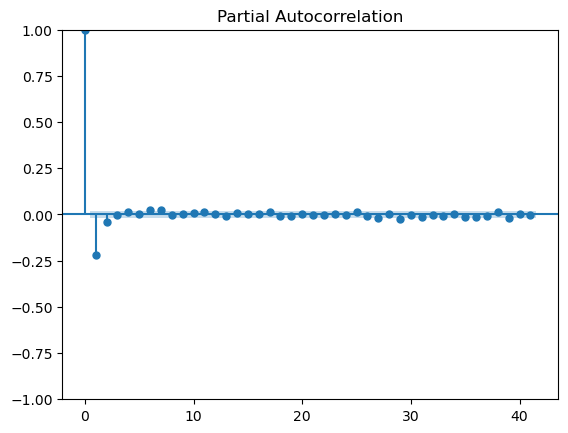

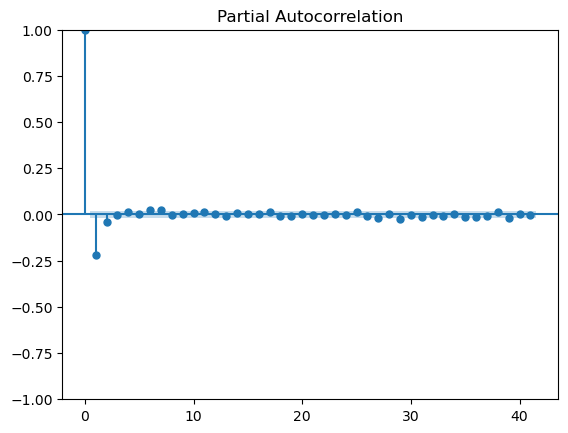

In [22]:
all_prices_squid_ink['mid_price_first_diff'] = all_prices_squid_ink['mid_price'].diff()

plot_pacf(all_prices_squid_ink_one['mid_price_first_diff'].dropna())


# Arima Model

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm

In [50]:
# Extract mid-prices
data = np.array(
    all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] < 400000)]['mid_price'].values
)

# Split into initial training and testing sets
initial_train_size = int(0.3 * len(data))  # start with 30% training
test_data = data[initial_train_size:]
predictions = []

for i in tqdm(range(len(test_data))):
    # Expand training data by one new point at a time
    train_window = data[i:initial_train_size + i]

    # Fit ARIMA
    model = ARIMA(train_window, order=(1, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast()[0]  # 1-step forecast

    predictions.append(forecast)

# Evaluate predictions
test_values = test_data  # actual future values
predictions = np.array(predictions)

rmse = np.sqrt(mean_squared_error(test_values, predictions))
mae = mean_absolute_error(test_values, predictions)
mape = np.mean(np.abs((test_values - predictions) / test_values)) * 100

# 5. Print results
print(f"ARIMA(1,1,0) Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

100%|██████████| 8400/8400 [04:29<00:00, 31.14it/s]


ARIMA(1,1,0) Performance:
RMSE: 1.3460
MAE : 0.9724
MAPE: 0.05%


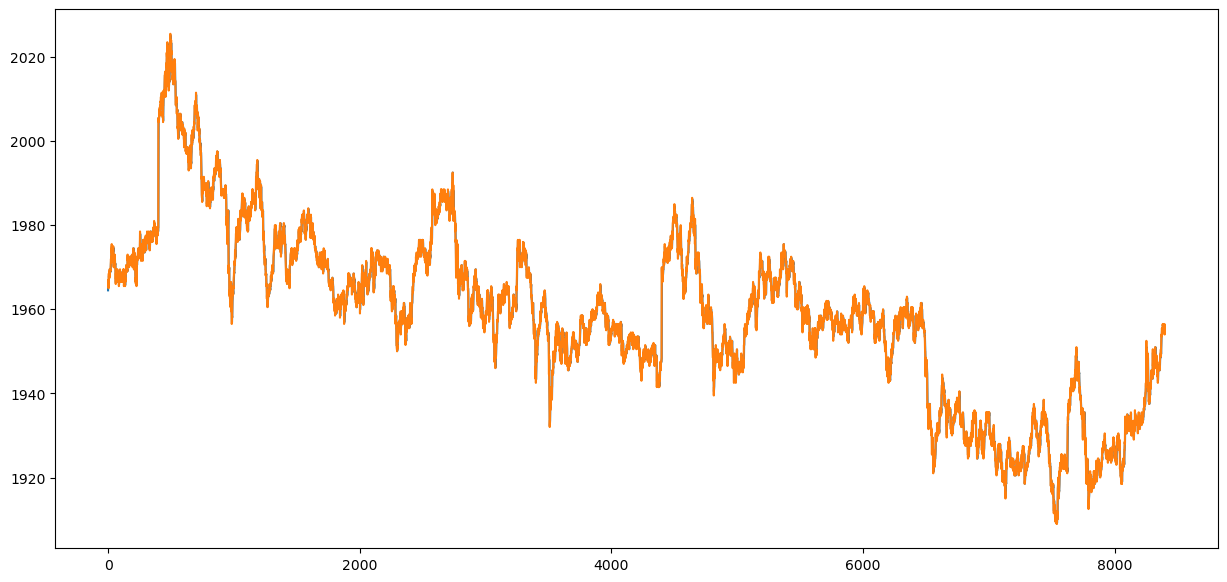

In [51]:
fig, ax = plt.subplots( figsize=(15, 7))
ax.plot(predictions, label = 'predictions')
ax.plot(test_values, label = 'test data')